#### Saikiran N. Pasikanti
## Machine Learning Foundation
# Principal Component Analysis

Following code snippet will load the face data in a  matrix X. 
There are 5000 greyscale image thumbnails. Each of size 32 x 32 pixels
The pixels are stored as a single row of size 32 x 32 = 1024
The dimensions of the X matrix is thus 5000 x 1024. Each row is a flattened image.

```require(R.matlab)
data <- readMat('ex7faces.mat')
X <- data$X```

Display the number of rows and columns in the matrix X

Lets visualize some images

For visualization we need to convert the image from a row vector (1 x 1024) to a square matrix (32 x 32)

```img1 <- X[1,] #assign 1st image to img1
img1 <- matrix(img1, 32, 32) #reshape the matrix
image(img1, axes = FALSE, col = grey(seq(0, 1, length = 256))) #this will display the image in the plots```

If the displayed image is too large or too small then accordingly resize the plots window (make it small or largeto see the clear picture). You should see the face of a man with spectacles

Display images 2, 3, 4 of the matrix X and store them in variables img2, img3, img4

Lets plot all the 4 images

```op <- par(mfrow=c(2,2))
image(img1, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img2, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img3, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img4, axes = FALSE, col = grey(seq(0, 1, length = 256)))
par(op)```

Again, if you see stretched or squashed images then resize the plots window to see better images

Apply PCA on X

Compute Z(i) for the first 4 images using the first 100 PCA components and store them in z1, z2, z3, and z4 variables.
Essentially here we have reduced the images from 1024 dimensional data to 100 dimensional data

Re-create approximate images using the Z values for the first 4 images and store them in Xhat1, Xhat2, Xhat3, Xhat4

Plot the original images and their approximations, i.e. img1 and Xhat1, img2 and Xhat2, and so on for the first 4 images and observethe approximation quality

Repeat the process of computing Z and Xhat and plot of original and approximate images by increasing the number of PCA components, from 100 to 200 to 400

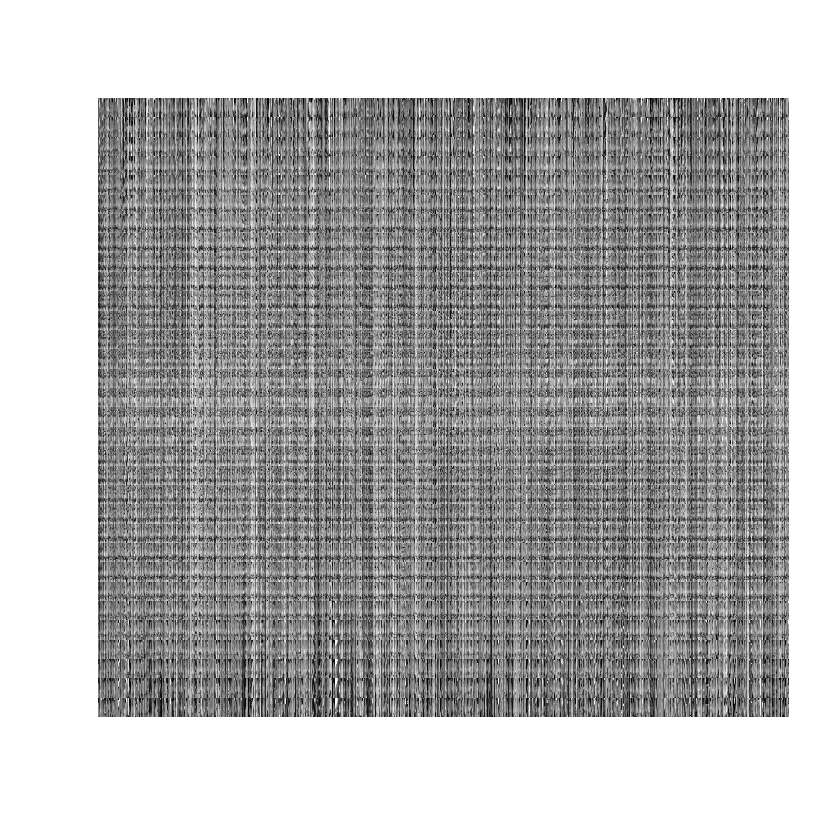

In [4]:
################## DATA SET = EIGEN FACES (32x32 pixels = 5000 images) ######################

#install.packages("R.matlab")
require(R.matlab)

setwd("C:\\Users\\saikiran\\Documents\\GitHub\\MLF Foundation using R\\PCA")
data <- readMat("faces-dataset.mat")
X <- data$X

image(X,                                   # this will display the image in the plots
      axes = FALSE, 
      col = grey(seq(0, 1, length = 256))) # save in the grayscale format

In [5]:
######### Task (1) Display the number of rows and columns in the matrix X #################
dimn <- dim(X)
print(paste("Matrix X has Rows =",dimn[1], "and Columns =",dimn[2]))

# Dataset contains 5000 example faces, each 32px by 32px (1024 pixels total per face) 

[1] "Matrix X has Rows = 5000 and Columns = 1024"


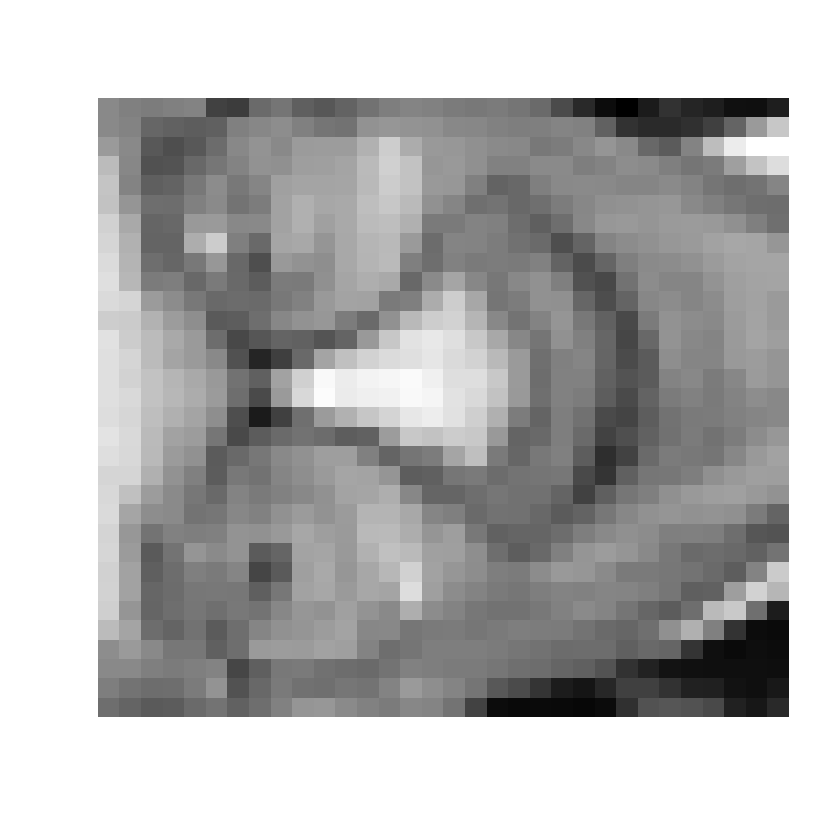

In [6]:
## Visualization of images
img1 <- X[1,]                     # assign 1st image to img1
img1 <- matrix(img1, 32, 32)      # reshape the matrix

image(img1,                       # this will display the image in the plots
      axes = FALSE, 
      col = grey(seq(0, 1, length = 256)), pty = "s") #square image

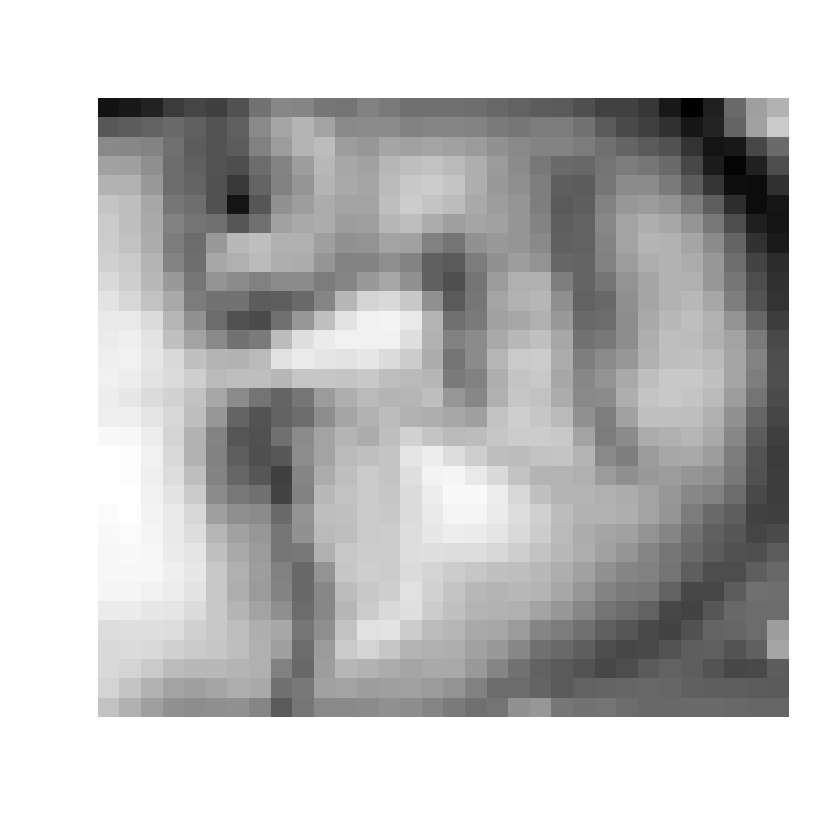

In [8]:
######## TASK(2) : Display images 2, 3, 4 of the matrix X and ###########################
######## store them in variables img2, img3, img4 #######################################
img2 <- X[2,]                     # assign 2nd image to img1
img2 <- matrix(img2, 32, 32)  # reshape the matrix

image(img2,                       # this will display the image in the plots
      axes = FALSE, 
      col = grey(seq(0, 1, length = 256)), pty = "s")

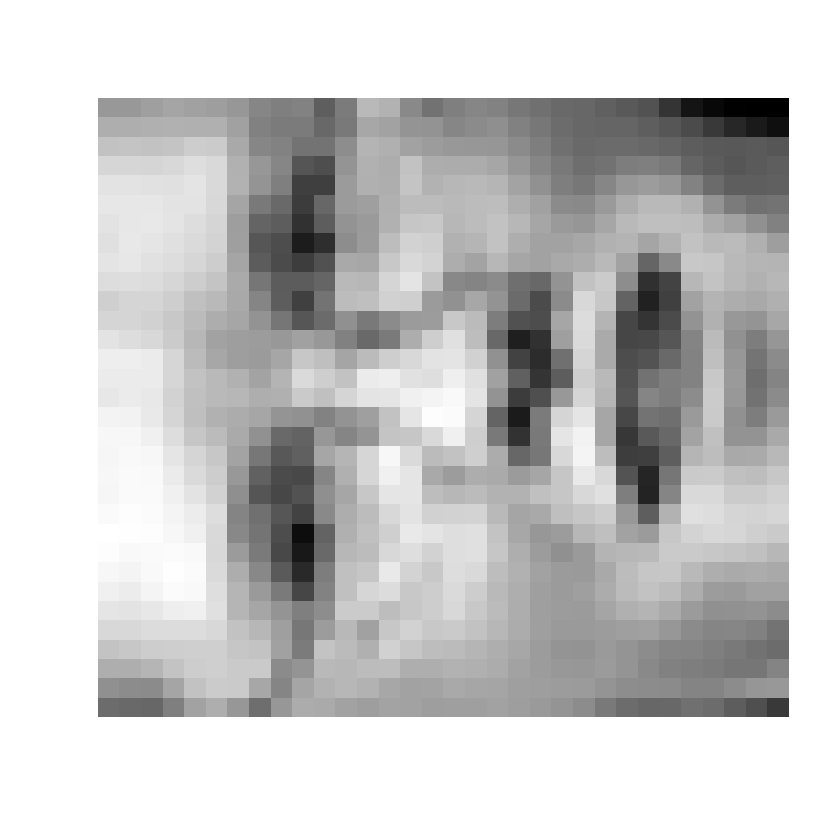

In [9]:
img3 <- X[3,]                     # assign 3rd image to img1
img3 <- matrix(img3, 32, 32)      # reshape the matrix

image(img3,                       # this will display the image in the plots
      axes = FALSE, 
      col = grey(seq(0, 1, length = 256)), pty = "s") 

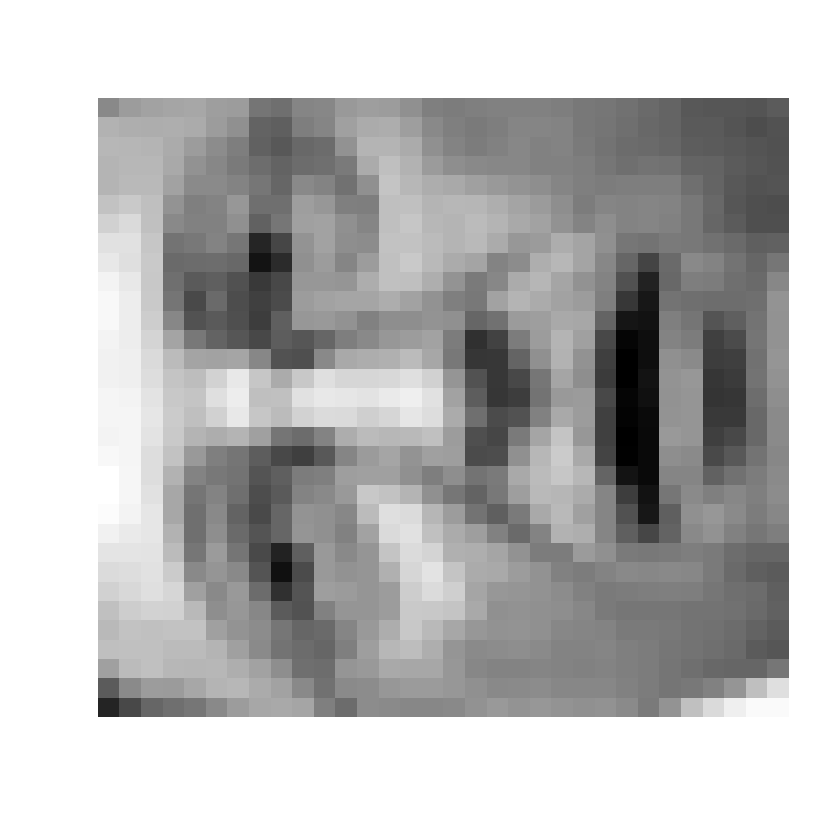

In [10]:
img4 <- X[4,]                     # assign 4th image to img1
img4 <- matrix(img4, 32, 32)      # reshape the matrix

image(img4,                       # this will display the image in the plots
      axes = FALSE, 
      col = grey(seq(0, 1, length = 256)), pty = "s")

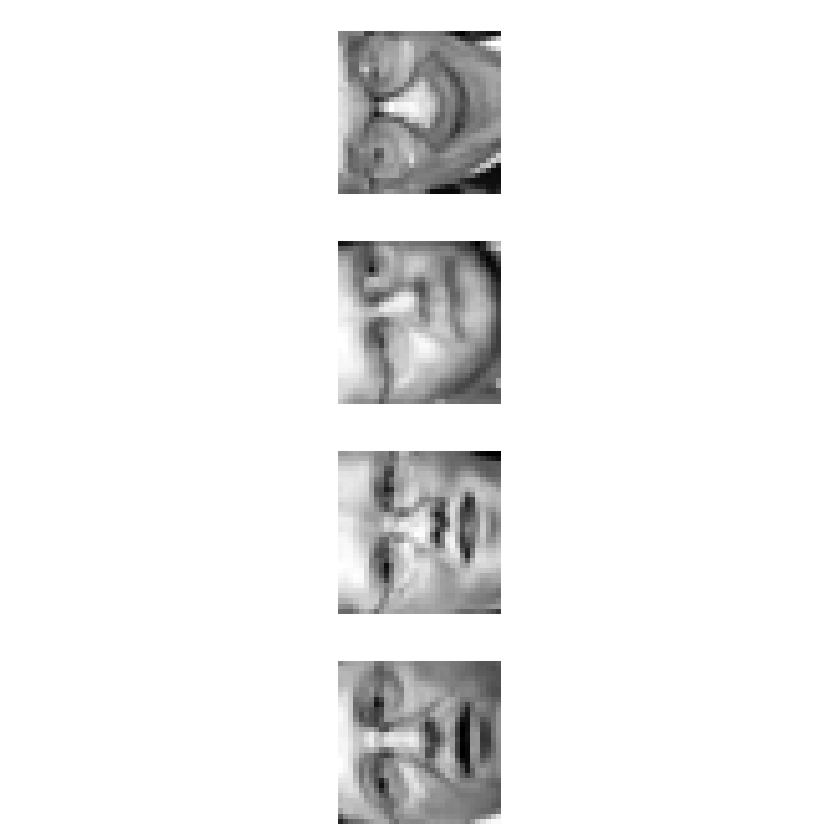

In [11]:
## Lets plot all the 4 images
op <- par(mfrow=c(4,1), mar=c(1,1,2,1), pty = "s") 
image(img1, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img2, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img3, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img4, axes = FALSE, col = grey(seq(0, 1, length = 256)))
par(op)

In [13]:
ir.pca <- prcomp(X, center = TRUE, scale. = TRUE)
# There are in genral min(n-1, p) informative principal components in a data set 
# with n observations and p variables. Hence ir.pca is 32x32

In [14]:
# Standard deviation of each component
ir.pca$sdev

[1] 18.35824125 11.44284918  7.39550754  6.30316556  5.75869923  4.78506313
   [7]  4.50829909  4.40628771  3.99738328  3.83447620  3.67665847  3.59060866
  [13]  3.25340392  3.07041633  2.90970501  2.90332090  2.71752392  2.66175254
  [19]  2.60673317  2.55204987  2.36864771  2.34289479  2.31688190  2.27211584
  [25]  2.23704016  2.19683916  2.19156380  2.12243620  2.08117806  2.05233635
  [31]  2.00924052  1.98104576  1.91190169  1.88169689  1.86269489  1.79694888
  [37]  1.78396081  1.76855201  1.75007390  1.71284615  1.69702932  1.67351142
  [43]  1.62951481  1.61599978  1.61170370  1.57919943  1.55020900  1.53175750
  [49]  1.51569170  1.48618344  1.46945451  1.43498867  1.42742886  1.41109633
  [55]  1.40199178  1.37617179  1.36337029  1.34230041  1.33521876  1.32873117
  [61]  1.30870419  1.29817569  1.27442962  1.23649802  1.22497909  1.22017012
  [67]  1.21724358  1.21105483  1.18753477  1.17269957  1.15894795  1.13749469
  [73]  1.13163750  1.12200280  1.10182225  1.09562758  1.08706420  1.08207806
  [79]  1.07267992  1.06256297  1.05536956  1.04261015  1.03327307  1.02268545
  [85]  1.01528893  1.00459379  0.99728815  0.98296800  0.98028422  0.97221434
  [91]  0.96343199  0.95317429  0.94745183  0.93716595  0.92593316  0.91310642
  [97]  0.90956849  0.90367948  0.89549174  0.88324721  0.87669903  0.87255241
 [103]  0.86363853  0.86177471  0.83819594  0.83586369  0.82742495  0.82353666
 [109]  0.81832186  0.81064889  0.80492306  0.80140134  0.79623800  0.78862269
 [115]  0.78586805  0.77947818  0.77876580  0.77121368  0.76252040  0.75585866
 [121]  0.75467688  0.75057069  0.74892414  0.73935977  0.73275068  0.72740650
 [127]  0.72219150  0.71958267  0.70747293  0.70401489  0.70139652  0.70055010
 [133]  0.69563436  0.68610562  0.68235086  0.67962380  0.67766161  0.67443958
 [139]  0.67179888  0.66987289  0.66013567  0.65624735  0.65388404  0.64945645
 [145]  0.63949622  0.63773207  0.63535455  0.63018241  0.62820028  0.62582022
 [151]  0.62338617  0.61739911  0.61428252  0.60709805  0.60488720  0.60325016
 [157]  0.59615326  0.59398192  0.59132013  0.58898086  0.58264807  0.58095801
 [163]  0.57486194  0.57265388  0.57161330  0.56739855  0.56492342  0.56242648
 [169]  0.55883019  0.55464841  0.55083987  0.54759617  0.54642232  0.54435781
 [175]  0.53847595  0.53798981  0.53365146  0.53133544  0.52665895  0.52430668
 [181]  0.52214381  0.51766879  0.51545104  0.51228050  0.51172636  0.50966948
 [187]  0.50764816  0.50604435  0.50515848  0.50438198  0.49784182  0.49222008
 [193]  0.49123066  0.48882163  0.48591375  0.48360834  0.48174401  0.47895940
 [199]  0.47636623  0.47322271  0.47264444  0.46923756  0.46619788  0.46576269
 [205]  0.46260602  0.45930480  0.45767539  0.45712772  0.45537165  0.45464257
 [211]  0.45206436  0.44627756  0.44471541  0.44168348  0.43989973  0.43826667
 [217]  0.43697411  0.43374389  0.43249912  0.43001909  0.42680250  0.42487554
 [223]  0.42309732  0.42055549  0.41810578  0.41750996  0.41536676  0.41474451
 [229]  0.41317939  0.41050349  0.40848499  0.40685495  0.40515862  0.40218933
 [235]  0.40054612  0.39988192  0.39820292  0.39563890  0.39472703  0.39173787
 [241]  0.39086738  0.38818660  0.38548048  0.38478111  0.38317224  0.38153635
 [247]  0.37874797  0.37765971  0.37544831  0.37340750  0.37255080  0.37104234
 [253]  0.36964757  0.36832942  0.36672680  0.36508706  0.36415681  0.36227173
 [259]  0.36007858  0.35814280  0.35672536  0.35605638  0.35475345  0.35186223
 [265]  0.35019909  0.34890978  0.34813603  0.34733851  0.34642300  0.34285659
 [271]  0.34211364  0.34118617  0.33985588  0.33819963  0.33760468  0.33496532
 [277]  0.33261911  0.33172072  0.33136435  0.32913396  0.32795136  0.32641112
 [283]  0.32537672  0.32410278  0.32246999  0.32197695  0.31918773  0.31807037
 [289]  0.31686954  0.31487115  0.31398245  0.31391708  0.31353247  0.31153606
 [295]  0.30993766  0.30789905  0.30685667  0.30626115  0.30507897  0.30378898
 [301]  0.30307471  0.30157049  0.30009430  0.2988946

In [15]:
# A numeric matrix which provides the data for the principal components analysis
ir.pca$x
dim(ir.pca$x)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1015,PC1016,PC1017,PC1018,PC1019,PC1020,PC1021,PC1022,PC1023,PC1024
-15.114595,-4.9888008,-5.7715006,-3.98239495,-1.18731727,-3.1280869,1.22390699,5.7314744,-0.80581173,1.49340442,...,0.0166130258,0.0071508312,0.0039554655,-1.466552e-02,-6.446364e-02,-1.808789e-02,0.0011800216,0.0125672236,6.034273e-03,1.721328e-02
-9.953269,3.4456806,-6.1568186,-2.81905789,0.90377283,-7.7809732,-2.36304719,1.2422968,-2.19833517,2.80306223,...,-0.0045539517,-0.0006344564,0.0065416274,-8.239792e-03,1.162549e-02,-6.911422e-03,-0.0007124553,-0.0014563192,2.344621e-03,-1.377564e-02
7.697931,6.2383308,-1.1330169,-6.61011731,-2.00129317,-5.5096715,0.14541833,-0.9408879,2.52691111,2.22402201,...,-0.0065067710,0.0121810652,-0.0111552694,-1.598031e-02,2.230920e-02,-2.873441e-03,0.0070174260,0.0035679877,7.743844e-03,8.255607e-03
-21.821773,1.2616999,0.1089599,-5.14383389,-0.87434956,-3.5379566,-2.13220311,-3.2312077,1.43024532,0.72280094,...,0.0242961172,-0.0126740025,-0.0065379928,-8.345297e-03,-9.729635e-03,-5.965296e-05,0.0111158069,-0.0072433795,-9.911196e-03,-1.625757e-02
-29.175288,8.5050140,2.1767342,-9.15002349,-2.35965916,-1.8848183,7.21398935,0.2102666,3.10201791,-1.38456345,...,0.0231423384,-0.0012555431,-0.0138592349,4.854126e-03,2.216346e-03,-1.072988e-02,-0.0100287734,-0.0053166056,-6.375612e-05,1.575914e-02
12.254487,-3.3455789,12.9997959,-2.70658106,-2.00337503,2.9061767,-3.20146101,3.7128802,-1.84431772,7.52109634,...,-0.0129231633,-0.0009008054,-0.0158033892,-8.280092e-03,-3.224637e-03,9.741135e-03,-0.0221272434,-0.0219344865,-3.677000e-03,-7.461092e-03
6.540908,2.2009905,6.3439152,-1.59011656,1.76592255,-1.9201690,0.02590289,-3.9087850,-3.18539786,0.04503064,...,-0.0189463077,0.0193820318,-0.0194051199,3.493502e-02,1.765142e-02,-4.931053e-03,-0.0009986355,0.0194432992,4.169700e-02,-1.431218e-02
11.212507,-7.9359785,-3.8109888,1.63169595,-1.58559469,-2.1293101,5.67278372,2.2914902,0.34484480,-2.74554852,...,0.0309143277,0.0008081158,-0.0085571254,-8.471322e-03,-2.410716e-02,2.241718e-02,0.0173980927,0.0065774201,4.367809e-03,2.666061e-02
-7.174096,-4.4781171,-3.4148671,-5.79633417,-7.44572873,-1.2017952,0.42956196,8.6303719,0.25189851,-1.50084823,...,0.0390190912,-0.0027876635,0.0082622392,2.765358e-02,-1.732122e-02,5.878420e-03,-0.0205614071,-0.0085490899,1.220015e-04,-2.084683e-02
-6.961718,16.5779182,8.1759110,0.08739492,0.17221220,-5.8096216,0.01548076,-1.9125551,-1.88215044,-3.94036330,...,0.0001016508,0.0121969834,-0.0291403203,-1.210305e-03,8.134129e-04,-8.230555e-03,0.0019748682,-0.0026178639,5.642152e-04,-3.931511e-04


[1] 5000 1024

In [16]:
# The print method return the standard deviation of each of the PCs,
# and their rotation which are the coefficients of the linear combinations of the continous variables.
print(ir.pca)

Standard deviations (1, .., p=1024):
   [1] 18.35824125 11.44284918  7.39550754  6.30316556  5.75869923  4.78506313
   [7]  4.50829909  4.40628771  3.99738328  3.83447620  3.67665847  3.59060866
  [13]  3.25340392  3.07041633  2.90970501  2.90332090  2.71752392  2.66175254
  [19]  2.60673317  2.55204987  2.36864771  2.34289479  2.31688190  2.27211584
  [25]  2.23704016  2.19683916  2.19156380  2.12243620  2.08117806  2.05233635
  [31]  2.00924052  1.98104576  1.91190169  1.88169689  1.86269489  1.79694888
  [37]  1.78396081  1.76855201  1.75007390  1.71284615  1.69702932  1.67351142
  [43]  1.62951481  1.61599978  1.61170370  1.57919943  1.55020900  1.53175750
  [49]  1.51569170  1.48618344  1.46945451  1.43498867  1.42742886  1.41109633
  [55]  1.40199178  1.37617179  1.36337029  1.34230041  1.33521876  1.32873117
  [61]  1.30870419  1.29817569  1.27442962  1.23649802  1.22497909  1.22017012
  [67]  1.21724358  1.21105483  1.18753477  1.17269957  1.15894795  1.13749469
  [73]  1.13163

In [17]:
# The summary method describe the importance of the PCs.
summary(ir.pca)
# The first row describe again the standard deviation associated with each PC. 
# The second row shows the proportion of the variance in the data explained by each component 
# while the third row describe the cumulative proportion of explained variance. 

Importance of components:
                           PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     18.3582 11.4428 7.39551 6.3032 5.75870 4.78506 4.50830
Proportion of Variance  0.3291  0.1279 0.05341 0.0388 0.03239 0.02236 0.01985
Cumulative Proportion   0.3291  0.4570 0.51041 0.5492 0.58159 0.60395 0.62380
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     4.40629 3.9974 3.83448 3.6767 3.59061 3.25340 3.07042
Proportion of Variance 0.01896 0.0156 0.01436 0.0132 0.01259 0.01034 0.00921
Cumulative Proportion  0.64276 0.6584 0.67272 0.6859 0.69852 0.70885 0.71806
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.90971 2.90332 2.71752 2.66175 2.60673 2.55205 2.36865
Proportion of Variance 0.00827 0.00823 0.00721 0.00692 0.00664 0.00636 0.00548
Cumulative Proportion  0.72633 0.73456 0.74177 0.74869 0.75532 0.76168 0.76716
                          PC22    PC23

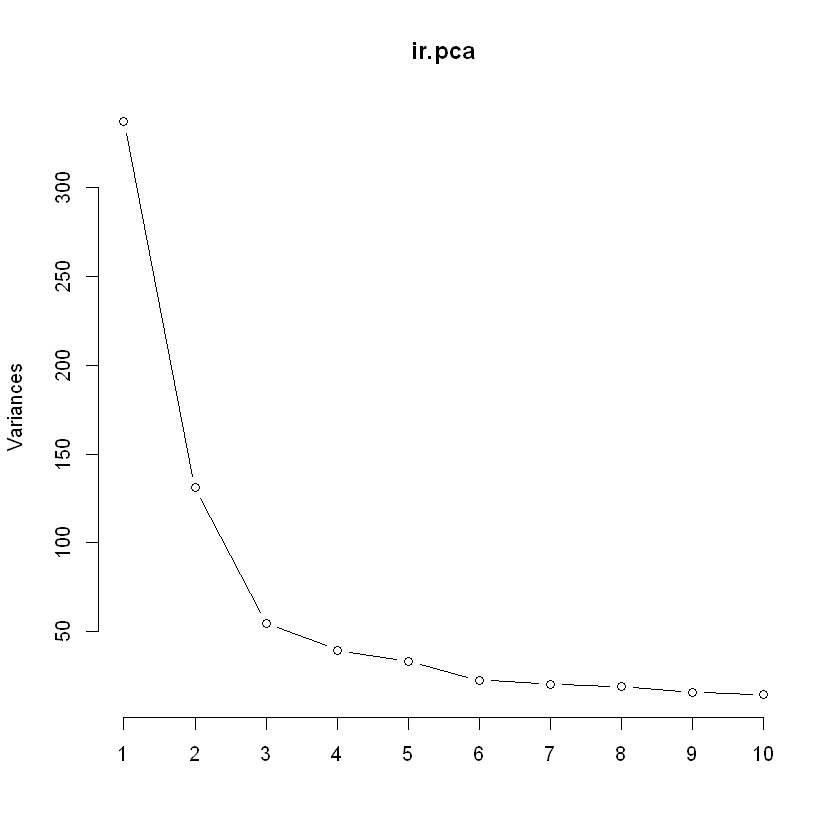

In [18]:
# plot method returns a plot of the variances (y-axis) associated with the PCs (x-axis). 
# useful to decide how many PCs to retain for further analysis. 
plot(ir.pca, type = "l")

In [19]:
###### TASK (3) - Compute Z(i) for the first 4 images using the first 100 PCA components ####
##### and store them in z1, z2, z3, and z4 variables ####################################

# z(i) = matrix of { transpose of x(i) * eigen(i)orPCA(i)}
nPCA <- 100
Z <- ir.pca$x[,1:nPCA] %*% t(ir.pca$rotation[,1:nPCA])
z1 <- Z[1,]
z2 <- Z[2,]
z3 <- Z[3,]
z4 <- Z[4,]

In [20]:
##### TASK (4) - Re-create approximate images using the Z values for the first 4 images ###
##### and store them in Xhat1, Xhat2, Xhat3, Xhat4 ########################################

## unscale and uncenter the data
if(ir.pca$scale != FALSE){
  Z <- scale(Z, center = FALSE , scale=1/ir.pca$scale)
}
if(all(ir.pca$center != FALSE)){
  Z <- scale(Z, center = -1 * ir.pca$center, scale=FALSE)
}

Xhat1 <- matrix( z1, 32, 32)
Xhat2 <- matrix( z2, 32, 32)
Xhat3 <- matrix( z3, 32, 32)
Xhat4 <- matrix( z4, 32, 32)

Warning message in if (ir.pca$scale != FALSE) {:
"the condition has length > 1 and only the first element will be used"

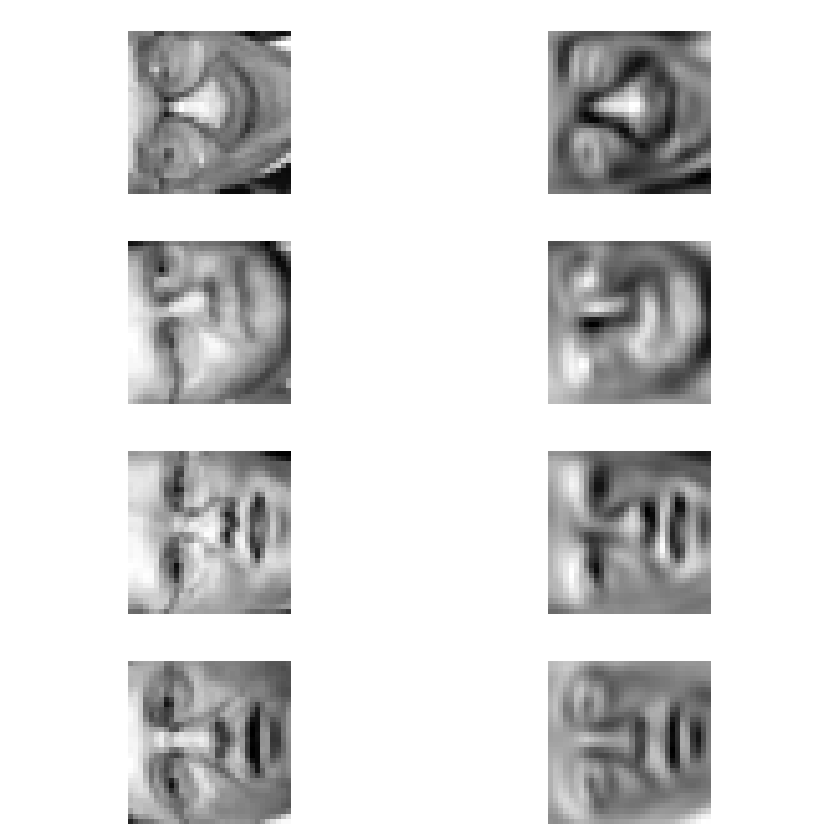

In [21]:
###### TASK (5) - Plot the original images and their approximations, i.e. img1 and Xhat1, img2 ###### 
###### and Xhat2, and so on for the first 4 images and observe the approximation quality ############


op <- par(mfrow=c(4,2), mar=c(1,1,2,1), pty = "s")
### adjust plot area
image(img1, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat1, axes = FALSE, col = grey(seq(0, 1, length = 256)))

image(img2, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat2, axes = FALSE, col = grey(seq(0, 1, length = 256)))

image(img3, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat3, axes = FALSE, col = grey(seq(0, 1, length = 256)))

image(img4, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat4, axes = FALSE, col = grey(seq(0, 1, length = 256)))
# Rebuilt images were close to the originals, they appear as ghost-like faces`

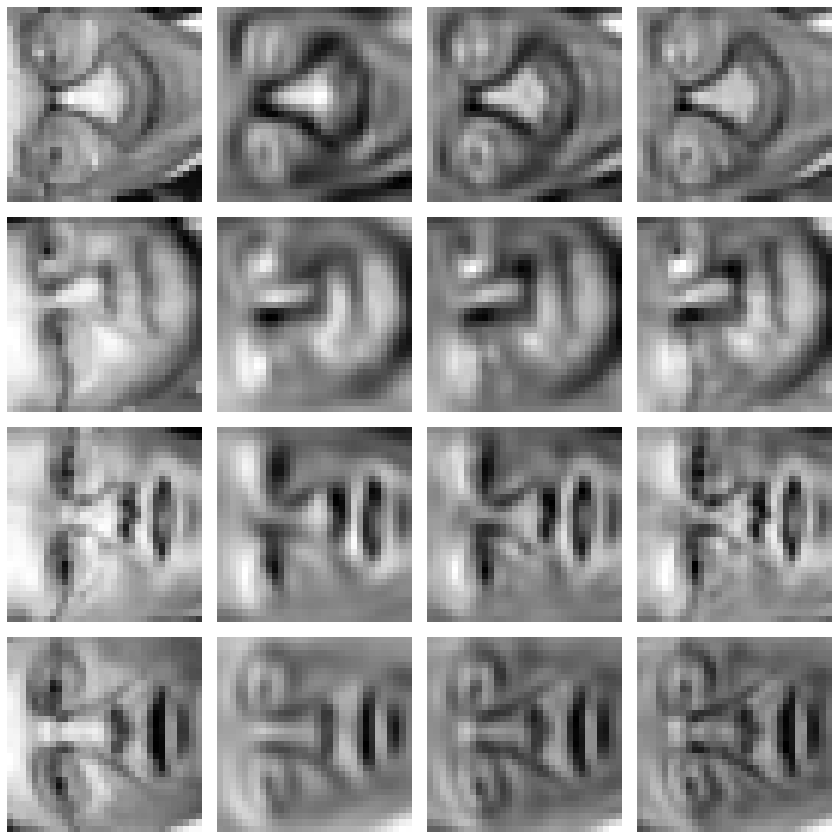

In [22]:
####### TASK (6) - Repeat the process of computing Z and Xhat and plot of original and approximate ##########
##### images by increasing the number of PCA components, from 100 to 200 to 400 #############################
nPCA <- 200
Z200 <- ir.pca$x[,1:nPCA] %*% t(ir.pca$rotation[,1:nPCA])

nPCA <- 400
Z400 <- ir.pca$x[,1:nPCA] %*% t(ir.pca$rotation[,1:nPCA])


Xhat1.200 <- matrix( Z200[1,], 32, 32)
Xhat2.200 <- matrix( Z200[2,], 32, 32)
Xhat3.200 <- matrix( Z200[3,], 32, 32)
Xhat4.200 <- matrix( Z200[4,], 32, 32)

Xhat1.400 <- matrix( Z400[1,], 32, 32)
Xhat2.400 <- matrix( Z400[2,], 32, 32)
Xhat3.400 <- matrix( Z400[3,], 32, 32)
Xhat4.400 <- matrix( Z400[4,], 32, 32)

par(mfcol=c(4,4), mar=c(0.5,0.5,0.5,0.5), pty = "s")
##ORIGINAL IMAGES
image(img1, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img2, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img3, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(img4, axes = FALSE, col = grey(seq(0, 1, length = 256)))

#RECONSTRUCTED FROM 100 PCA
image(Xhat1, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat2, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat3, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat4, axes = FALSE, col = grey(seq(0, 1, length = 256)))

#RECONSTRUCTED FROM 200 PCA
image(Xhat1.200, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat2.200, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat3.200, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat4.200, axes = FALSE, col = grey(seq(0, 1, length = 256)))

#RECONSTRUCTED FROM 400 PCA
image(Xhat1.400, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat2.400, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat3.400, axes = FALSE, col = grey(seq(0, 1, length = 256)))
image(Xhat4.400, axes = FALSE, col = grey(seq(0, 1, length = 256)))